#### Data Set

Como informacion voy a usar principalmente el dataset proporcionado por netflix que toma informacion sobre las peliculas y series mas vistas globalmente por cada semana en los ultimos 3 años. Para definir el top 10 netflix se basa en las horas vistas de la serie/pelicula esa semana
Tambien usare como complementos otras bases de datos que vaya investigando a medida que hago el EDA.


Las columnas se componen de la siguiente manera:

| Nombre | Informacion
|----------|----------
| week | Semana sobra la que toma informacion  | 
| weekly_rank| Ranking del 1 al 10   | 
| show_title    | Titulo de la pelicula/serie   | 
| season_title | nombre de la temporada(si la tiene)   | 
| weekly_hours_viewed| Horas vistas esa semana   | 
| runtime    | Duracion en horas del producto   | 
| weekly_views | Veces vista esa semana   | 
| cumulative_weeks_in_top_10| Cantidad de semanas totales en el top 10   | 
| is_staggered_launch    | Si fue un lanzamiento escalonado  | 
| episode_launch_details    | Detalles del lanzamiento escalonado   | 



Lo que busco encontrar entre todos estos datos es:
- Las producciones mas vistas en los ultimos 3 años
- Ver si estas producciones coinciden con una critica positiva, negativa, o ninguna de las dos. 
- Ver si coincide lo mas visto con lo que mas duró en el top 10 a lo largo de las semanas
- Intentar hacer alguna recomendacion basada en todo lo anterior
- Otras preguntas que me puedan surgir haciendolo

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [4]:
df = pd.read_excel("./data/all-weeks-global.xlsx")

In [5]:
nombres = sorted(df["show_title"].drop_duplicates().tolist())
nombres


["'83",
 '10 Days of a Bad Man',
 '10 Days of a Good Man',
 '1000 Miles from Christmas',
 '12 Strong',
 '13 Hours: The Secret Soldiers of Benghazi',
 '14 Peaks: Nothing Is Impossible',
 '1899',
 '1917',
 '2 Guns',
 '2 Hearts',
 '20th Century Girl',
 '21 Jump Street',
 '211',
 '28 Days Haunted',
 '365 Days',
 '365 Days: This Day',
 '4 Kings',
 '40 Years Young',
 '42 Days of Darkness',
 '47 Meters Down: Uncaged',
 '47 Ronin',
 '6 Underground',
 '65',
 '6ixtynin9 The Series',
 '7 Prisoners',
 '7 Women and a Murder',
 '85 South: Ghetto Legends',
 'A Bad Moms Christmas',
 'A Beautiful Life',
 'A Boy Called Christmas',
 'A California Christmas: City Lights',
 'A Castle For Christmas',
 'A Christmas Miracle for Daisy',
 'A Classic Horror Story',
 'A Cut Above',
 'A Day and a Half',
 'A Deadly Invitation',
 "A Dog's Journey",
 "A Dog's Way Home",
 'A Hard Day',
 "A Jazzman's Blues",
 'A Life Too Short: The Isabella Nardoni Case',
 'A Madea Homecoming',
 'A Man Called Otto',
 'A Man of Action',

In [6]:
######### Numero de cada nombre de serie/pelicula que estuvo en el top 10 semanal en los ultimos 3 años de Netflix.
cantidad = len(nombres)
cantidad

1669

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   week                        5120 non-null   object 
 1   category                    5120 non-null   object 
 2   weekly_rank                 5120 non-null   int64  
 3   show_title                  5120 non-null   object 
 4   season_title                2479 non-null   object 
 5   weekly_hours_viewed         5120 non-null   int64  
 6   runtime                     1040 non-null   float64
 7   weekly_views                1040 non-null   float64
 8   cumulative_weeks_in_top_10  5120 non-null   int64  
 9   is_staggered_launch         5120 non-null   bool   
 10  episode_launch_details      38 non-null     object 
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 405.1+ KB


In [56]:
asd = df['show_title'] == 'Red Notice'
df[asd][['week','weekly_hours_viewed']]
sns

,week,weekly_hours_viewed
2849,2022-07-31,4090000
3729,2022-02-27,4970000
3885,2022-01-30,6540000
3927,2022-01-23,7310000
3965,2022-01-16,8710000
4005,2022-01-09,11090000
4044,2022-01-02,14540000
4086,2021-12-26,12140000
4123,2021-12-19,12710000
4161,2021-12-12,18010000


In [9]:
####### Hago una copia del DF, cambio las semanas que eran str a date, elimino las ultimas dos columnas porque son irrelevantes para lo que quiero tratar.
df2 = df.copy()
df2['week'] = pd.to_datetime(df2['week'], errors = 'coerce')
df2 = df2.drop(df2.columns[-2:], axis=1) 
df2

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10
0,2023-12-10,Films (English),1,Leave the World Behind,NaN,98700000,2.3667,41700000.0,1
1,2023-12-10,Films (English),2,Family Switch,NaN,32900000,1.7667,18600000.0,2
2,2023-12-10,Films (English),3,Leo,NaN,25400000,1.7833,14200000.0,3
3,2023-12-10,Films (English),4,The Super Mario Bros. Movie,NaN,20300000,1.5333,13200000.0,2
4,2023-12-10,Films (English),5,Catering Christmas,NaN,12500000,1.4333,8700000.0,2
...,...,...,...,...,...,...,...,...,...
5115,2021-07-04,TV (Non-English),6,Elite,Elite: Season 1,10530000,NaN,NaN,1
5116,2021-07-04,TV (Non-English),7,Elite,Elite: Season 3,10200000,NaN,NaN,1
5117,2021-07-04,TV (Non-English),8,Elite,Elite: Season 2,10140000,NaN,NaN,1
5118,2021-07-04,TV (Non-English),9,Katla,Katla: Season 1,9190000,NaN,NaN,1


In [10]:
resultado = df[df['show_title'] == 'The Imitation Game']
resultado

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details


In [11]:
''' 
NETFLIX AND EDA: 
Hacer dos DF distintos, uno para series y otro para peliculas
agrupar por titulo y sumarle las horas vistas, para decir en un grafico "las mas miradas fueron estas", independeitemente del ranking en el top 10. Usar el titulo y el cumulative
para saber cuantas semnas estuvo trending, decir que habla de su popularidad ademaas de las horas.

hacer siempre comparacion serie/pelicula en slides distintas, uso mas tiempo. 
buscar datos de calidad de las 5 mas vistas en cualquier caso.

Dos slides de recomendaciones: 
- Las mas vistas para asegurarte entretenmiento (basado en la generalidad de las personas que no suele ser bueno)
- Las menos vistas para ser snob y hacerte el cool con tus amigos o invitadx especial
'''

' \nNETFLIX AND EDA: \nHacer dos DF distintos, uno para series y otro para peliculas\nagrupar por titulo y sumarle las horas vistas, para decir en un grafico "las mas miradas fueron estas", independeitemente del ranking en el top 10. Usar el titulo y el cumulative\npara saber cuantas semnas estuvo trending, decir que habla de su popularidad ademaas de las horas.\n\nhacer siempre comparacion serie/pelicula en slides distintas, uso mas tiempo. \nbuscar datos de calidad de las 5 mas vistas en cualquier caso.\n\nDos slides de recomendaciones: \n- Las mas vistas para asegurarte entretenmiento (basado en la generalidad de las personas que no suele ser bueno)\n- Las menos vistas para ser snob y hacerte el cool con tus amigos o invitadx especial\n'

In [12]:
dfpeliculas = df2.loc[df2["category"].str.contains('Films')]
dfpeliculas.drop(columns= 'season_title',inplace= True)
dfpeliculas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2560 entries, 0 to 5099
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   week                        2560 non-null   datetime64[ns]
 1   category                    2560 non-null   object        
 2   weekly_rank                 2560 non-null   int64         
 3   show_title                  2560 non-null   object        
 4   weekly_hours_viewed         2560 non-null   int64         
 5   runtime                     520 non-null    float64       
 6   weekly_views                520 non-null    float64       
 7   cumulative_weeks_in_top_10  2560 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 180.0+ KB


C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\2048210032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpeliculas.drop(columns= 'season_title',inplace= True)


In [13]:
dfpeliculas.drop(columns= ['runtime', 'weekly_views'], inplace= True)
dfpeliculas


C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\432807175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpeliculas.drop(columns= ['runtime', 'weekly_views'], inplace= True)


,week,category,weekly_rank,show_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2023-12-10,Films (English),1,Leave the World Behind,98700000,1
1,2023-12-10,Films (English),2,Family Switch,32900000,2
2,2023-12-10,Films (English),3,Leo,25400000,3
3,2023-12-10,Films (English),4,The Super Mario Bros. Movie,20300000,2
4,2023-12-10,Films (English),5,Catering Christmas,12500000,2
...,...,...,...,...,...,...
5095,2021-07-04,Films (Non-English),6,Security,2950000,1
5096,2021-07-04,Films (Non-English),7,Murder by the Coast,2690000,1
5097,2021-07-04,Films (Non-English),8,Xtreme,2650000,1
5098,2021-07-04,Films (Non-English),9,Rurouni Kenshin: Origins,2150000,1


In [14]:
''' vamos a dropear runtime y weekly views porque hay demasiados nulos y no aportan mucho a la comparacion'''
dfseries = df2.loc[df2['category'].str.contains('TV')]
dfseries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2560 entries, 20 to 5119
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   week                        2560 non-null   datetime64[ns]
 1   category                    2560 non-null   object        
 2   weekly_rank                 2560 non-null   int64         
 3   show_title                  2560 non-null   object        
 4   season_title                2477 non-null   object        
 5   weekly_hours_viewed         2560 non-null   int64         
 6   runtime                     520 non-null    float64       
 7   weekly_views                520 non-null    float64       
 8   cumulative_weeks_in_top_10  2560 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 200.0+ KB


In [33]:
cafe = dfseries['show_title'] == 'Café con aroma de mujer'
dfseries[cafe]

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10
2199,2022-11-27,TV (Non-English),10,Café con aroma de mujer,Café con aroma de mujer: Season 1,6310000,NaN,NaN,28
2235,2022-11-20,TV (Non-English),6,Café con aroma de mujer,Café con aroma de mujer: Season 1,6850000,NaN,NaN,27
2278,2022-11-13,TV (Non-English),9,Café con aroma de mujer,Café con aroma de mujer: Season 1,6580000,NaN,NaN,26
2799,2022-08-14,TV (Non-English),10,Café con aroma de mujer,Café con aroma de mujer: Season 1,6980000,NaN,NaN,25
2879,2022-07-31,TV (Non-English),10,Café con aroma de mujer,Café con aroma de mujer: Season 1,8730000,NaN,NaN,24
2916,2022-07-24,TV (Non-English),7,Café con aroma de mujer,Café con aroma de mujer: Season 1,9920000,NaN,NaN,23
2956,2022-07-17,TV (Non-English),7,Café con aroma de mujer,Café con aroma de mujer: Season 1,11210000,NaN,NaN,22
2996,2022-07-10,TV (Non-English),7,Café con aroma de mujer,Café con aroma de mujer: Season 1,11490000,NaN,NaN,21
3032,2022-07-03,TV (Non-English),3,Café con aroma de mujer,Café con aroma de mujer: Season 1,11570000,NaN,NaN,20
3074,2022-06-26,TV (Non-English),5,Café con aroma de mujer,Café con aroma de mujer: Season 1,10820000,NaN,NaN,19


In [16]:
cantidad_semanas = dfseries.groupby(['show_title','cumulative_weeks_in_top_10'])
cantidad_semanas2 = cantidad_semanas['weekly_rank'].unique().reset_index()
cantidad_semanas2

,show_title,cumulative_weeks_in_top_10,weekly_rank
0,1899,1,[2]
1,1899,2,[2]
2,1899,3,[2]
3,1899,4,[4]
4,1899,5,[7]
...,...,...,...
2026,Zom 100: Bucket List of the Dead,3,[9]
2027,Zom 100: Bucket List of the Dead,4,[10]
2028,Zombieverse,1,[5]
2029,jeen-yuhs: A Kanye Trilogy,1,[10]


In [17]:
top_titles = dfseries.loc[dfseries.groupby('show_title')['weekly_rank'].idxmax()]

# títulos con el valor más grande en "cumulative_weeks_in_top_10"
series_top5_titles = top_titles.nlargest(5, 'cumulative_weeks_in_top_10')
series_top5_titles

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10
2199,2022-11-27,TV (Non-English),10,Café con aroma de mujer,Café con aroma de mujer: Season 1,6310000,NaN,NaN,28
3279,2022-05-22,TV (Non-English),10,"Yo soy Betty, la fea","Yo soy Betty, la fea: Season 1",9650000,NaN,NaN,24
2159,2022-12-04,TV (Non-English),10,Extraordinary Attorney Woo,Extraordinary Attorney Woo: Season 1,5500000,NaN,NaN,21
3119,2022-06-19,TV (Non-English),10,Squid Game,Squid Game: Season 1,7480000,NaN,NaN,20
1349,2023-04-23,TV (English),10,Wednesday,Wednesday: Season 1,9500000,NaN,NaN,20


In [18]:
top_peliculas = dfpeliculas.loc[dfpeliculas.groupby('show_title')['weekly_rank'].idxmax()]
# títulos con el valor más grande en "cumulative_weeks_in_top_10"
peliculas_top5_titles = top_peliculas.nlargest(5, 'cumulative_weeks_in_top_10')
peliculas_top5_titles

,week,category,weekly_rank,show_title,weekly_hours_viewed,cumulative_weeks_in_top_10
1339,2023-04-23,Films (Non-English),10,All Quiet on the Western Front,1340000,22
2378,2022-10-23,Films (Non-English),9,Blood Red Sky,1510000,16
1899,2023-01-15,Films (Non-English),10,RRR (Hindi),1820000,16
2849,2022-07-31,Films (English),10,Red Notice,4090000,14
488,2023-09-17,Films (English),9,The Boss Baby,4600000,13


In [19]:
########### Producciones mas vistas en los ultimos 3 años 

topseries = dfseries.groupby('show_title')['weekly_hours_viewed'].sum().reset_index()
topseries.nlargest(30, "weekly_hours_viewed")

,show_title,weekly_hours_viewed
424,Stranger Things,2967980000
420,Squid Game,2315500000
558,Wednesday,1806850000
287,Manifest,1320520000
578,You,1245390000
301,Money Heist,1170200000
512,The Witcher,1117900000
67,Bridgerton,1040310000
341,Outer Banks,964410000
108,DAHMER,962470000


In [20]:
toppelis = dfpeliculas.groupby('show_title')['weekly_hours_viewed'].sum().reset_index()
toppelis.nlargest(20, "weekly_hours_viewed")

,show_title,weekly_hours_viewed
667,Red Notice,453990000
233,Don't Look Up,389580000
326,Glass Onion: A Knives Out Mystery,301730000
842,The Gray Man,265980000
786,The Adam Project,260520000
267,Extraction 2,254900000
888,The Mother,243060000
651,Purple Hearts,240480000
948,The Unforgivable,219550000
387,Hustle,198310000


In [21]:
clasificaciones_pelis= {'Red Notice': 6.3 , 'Dont Look Up': 7.2	 , 'Glass Onion: A Knives Out Mystery': 7.1,'The Gray Man': 6.5	,'The Adam Project': 6.7}	
clasificaciones_Series= {'Stranger Things': 8.7 , 'Squid Game': 8	 , 'Wednesday': 8.1	,'Manifest': 7.1	,'You': 7.7}

C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\2163576087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis')


(0.0, 3428.0169)

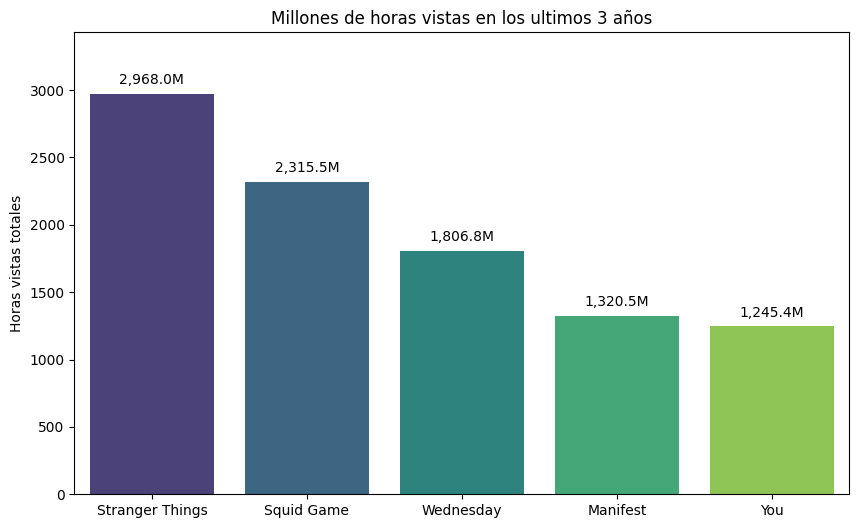

In [22]:
########### Grafico de series mas vistas:

topseries['weekly_hours_viewed'] = topseries['weekly_hours_viewed'] / 1000000
grafico = topseries.nlargest(5, "weekly_hours_viewed")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis')
plt.xlabel('')
plt.ylabel('Horas vistas totales')
plt.title('Millones de horas vistas en los ultimos 3 años')
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_ylim(top=ax.get_ylim()[1] * 1.1)



C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\2804495225.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis')


(0.0, 524.3584500000001)

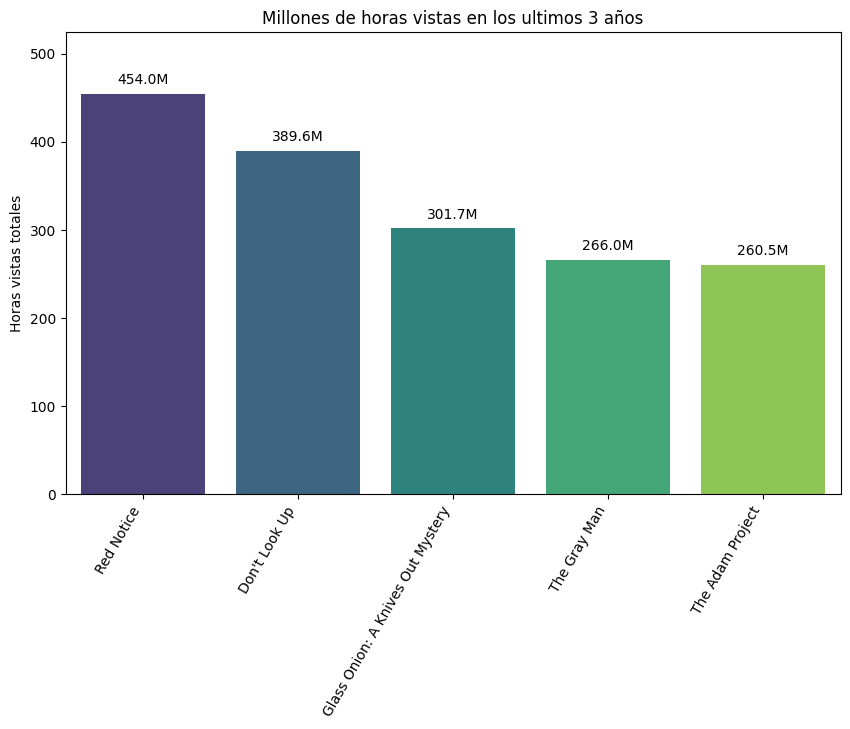

In [23]:
########### Grafico de peliculas mas vistas:
toppelis['weekly_hours_viewed'] = toppelis['weekly_hours_viewed'] / 1000000

grafico = toppelis.nlargest(5, "weekly_hours_viewed")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis')
plt.xlabel('')
plt.ylabel('Horas vistas totales')
plt.title('Millones de horas vistas en los ultimos 3 años')
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=60, ha='right')
ax.set_ylim(top=ax.get_ylim()[1] * 1.1)


In [46]:
############# Intento de historigrama fallido 
'''
top_5_show_titles = grafico['show_title'].unique()
top_5_show_titles
filtered_df = df[df['show_title'].isin(top_5_show_titles)]

# Crear un historiograma para cada uno de los 5 valores únicos en "show_title"
g = sns.FacetGrid(filtered_df, col="show_title", col_wrap=3, height=4, sharey=False)
g.map(sns.histplot, 'week', 'weekly_hours_viewed', bins=100, kde=True, color='skyblue')

# Añadir etiquetas y título
g.set_axis_labels("Weeks", "Weekly Hours Viewed")
g.fig.suptitle('Histogram for Weekly Hours Viewed - Top 5 Show Titles', y=1.02)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los historiogramas
plt.show()'''
selected_title = "Red Notice"
selected_data = df[df['show_title'] == selected_title]
selected_data





,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
2849,2022-07-31,Films (English),10,Red Notice,NaN,4090000,NaN,NaN,14,False,NaN
3729,2022-02-27,Films (English),10,Red Notice,NaN,4970000,NaN,NaN,13,False,NaN
3885,2022-01-30,Films (English),6,Red Notice,NaN,6540000,NaN,NaN,12,False,NaN
3927,2022-01-23,Films (English),8,Red Notice,NaN,7310000,NaN,NaN,11,False,NaN
3965,2022-01-16,Films (English),6,Red Notice,NaN,8710000,NaN,NaN,10,False,NaN
4005,2022-01-09,Films (English),6,Red Notice,NaN,11090000,NaN,NaN,9,False,NaN
4044,2022-01-02,Films (English),5,Red Notice,NaN,14540000,NaN,NaN,8,False,NaN
4086,2021-12-26,Films (English),7,Red Notice,NaN,12140000,NaN,NaN,7,False,NaN
4123,2021-12-19,Films (English),4,Red Notice,NaN,12710000,NaN,NaN,6,False,NaN
4161,2021-12-12,Films (English),2,Red Notice,NaN,18010000,NaN,NaN,5,False,NaN


C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\811577943.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico, palette='viridis')


(4.5, -0.75)

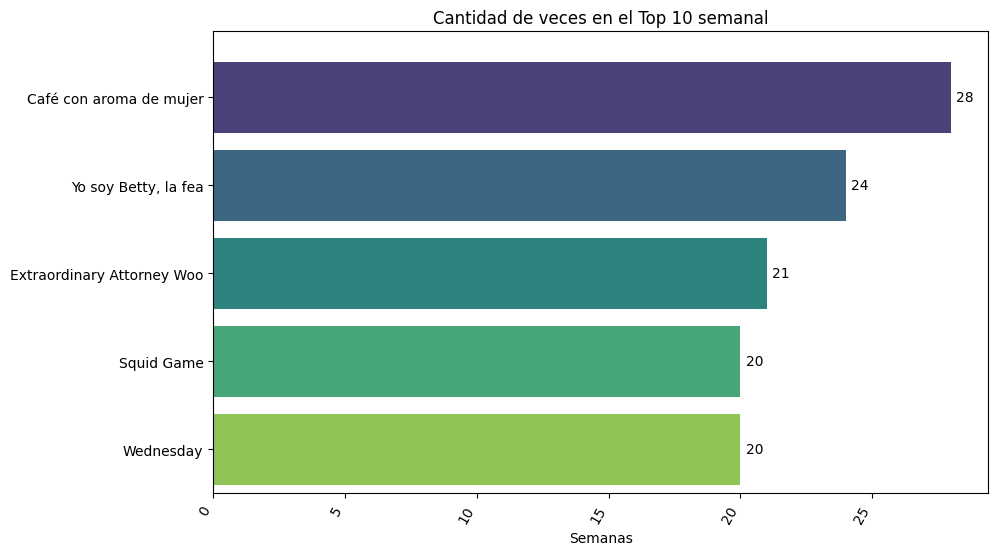

In [25]:
######Frecuencia series 
grafico = series_top5_titles

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico, palette='viridis')

plt.xlabel('Semanas')
plt.ylabel('')
plt.title('Cantidad de veces en el Top 10 semanal')
plt.ticklabel_format(style='plain', axis='x')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.0f}',  
                (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.xticks(rotation=60, ha='right')
ax.set_ylim(top=ax.get_ylim()[1] * 1.5)

C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\389494462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico, palette='viridis')


(4.5, -0.75)

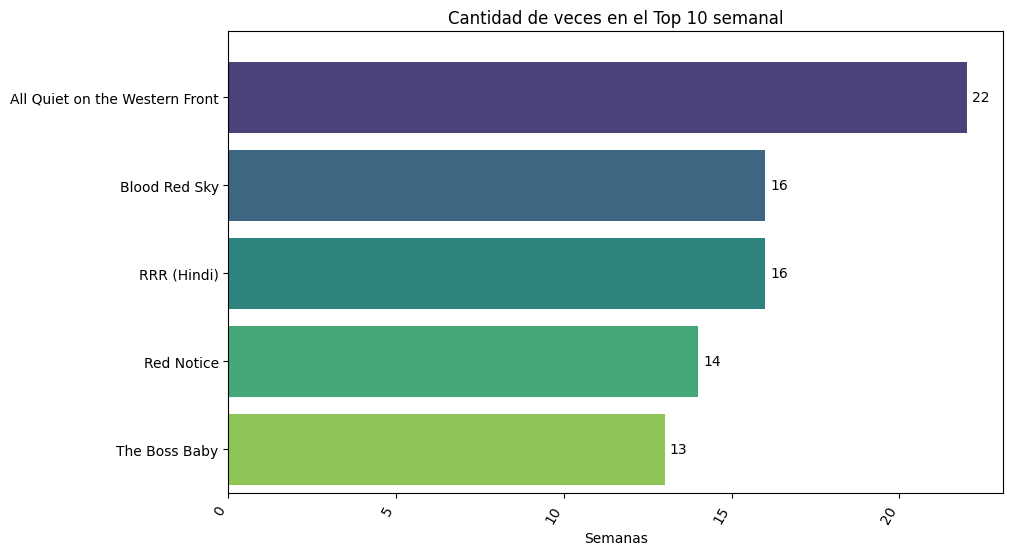

In [26]:
######### Frecuencia Pelis 
grafico = peliculas_top5_titles

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico, palette='viridis')

plt.xlabel('Semanas')
plt.ylabel('')
plt.title('Cantidad de veces en el Top 10 semanal')
plt.ticklabel_format(style='plain', axis='x')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.0f}',  
                (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.xticks(rotation=60, ha='right')
ax.set_ylim(top=ax.get_ylim()[1] * 1.5)

C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\1739342881.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis', ax=axes[0, 0])
C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\1739342881.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='right')
C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\1739342881.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis', ax=axes[0, 1])
C:\Users\kaled

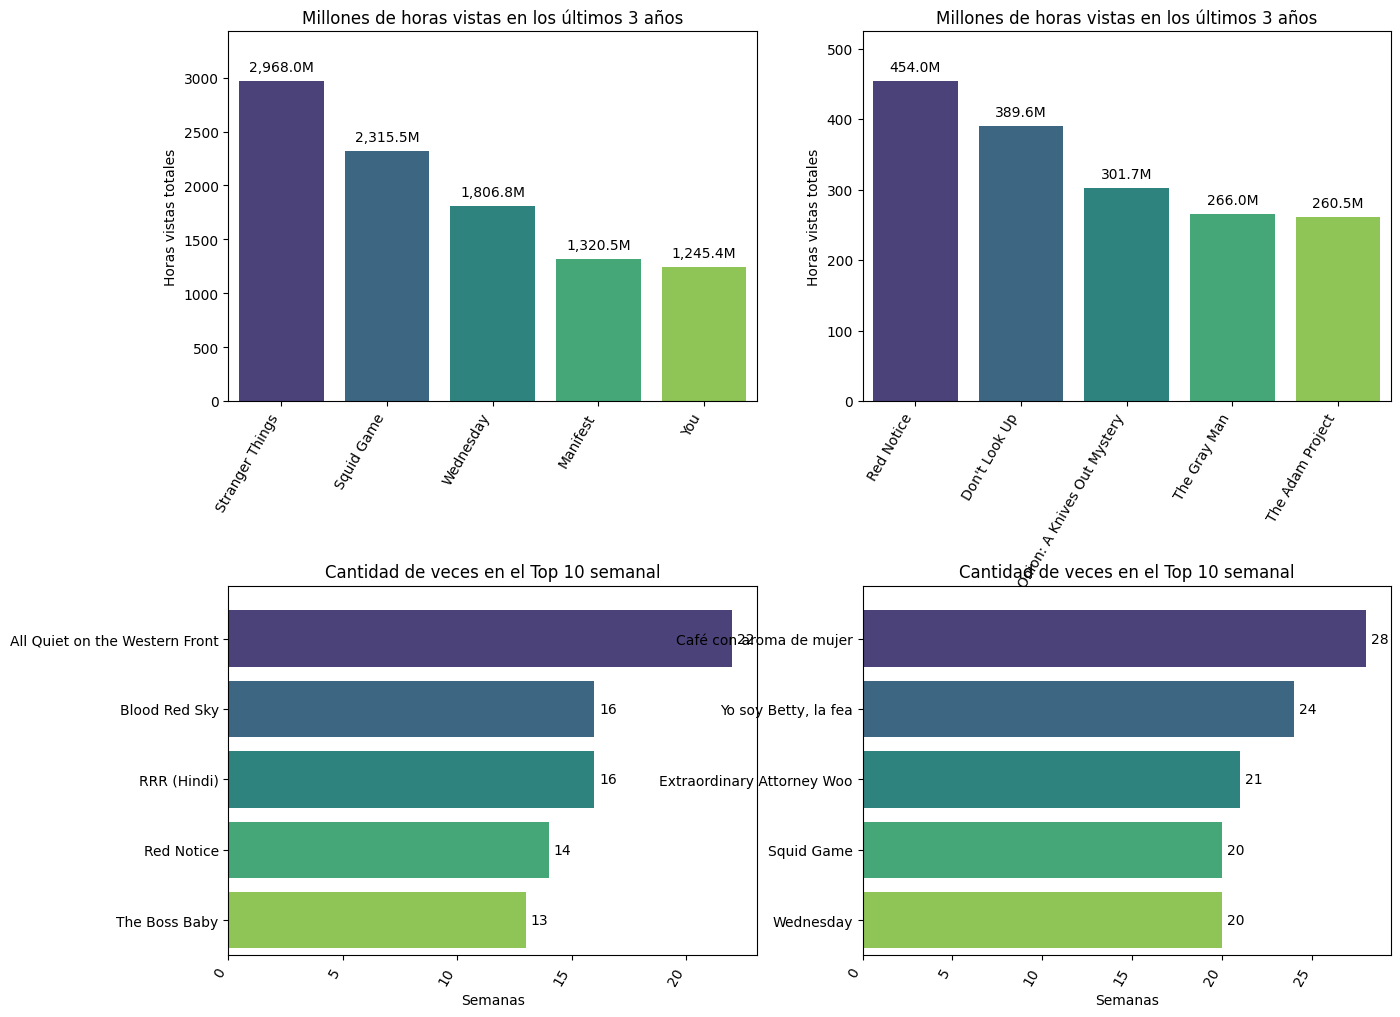

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes los DataFrames topseries, toppelis, series_top5_titles, y peliculas_top5_titles

# Preprocesamiento de datos para topseries y toppelis
# topseries['weekly_hours_viewed'] = topseries['weekly_hours_viewed'] / 1000000
# toppelis['weekly_hours_viewed'] = toppelis['weekly_hours_viewed'] / 1000000

# Crear una figura y subgráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

# Primer gráfico
grafico = topseries.nlargest(5, "weekly_hours_viewed")
ax1 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis', ax=axes[0, 0])
ax1.set_xlabel('')
ax1.set_ylabel('Horas vistas totales')
ax1.set_title('Millones de horas vistas en los últimos 3 años')
ax1.ticklabel_format(style='plain', axis='y')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.1f}M',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='right')
ax1.set_ylim(top=ax1.get_ylim()[1] * 1.1)

# Segundo gráfico
grafico = toppelis.nlargest(5, "weekly_hours_viewed")
ax2 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico, palette='viridis', ax=axes[0, 1])
ax2.set_xlabel('')
ax2.set_ylabel('Horas vistas totales')
ax2.set_title('Millones de horas vistas en los últimos 3 años')
ax2.ticklabel_format(style='plain', axis='y')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():,.1f}M',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='right')
ax2.set_ylim(top=ax2.get_ylim()[1] * 1.1)

# Tercer gráfico
grafico = peliculas_top5_titles
ax3 = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico, palette='viridis', ax=axes[1, 0])
ax3.set_xlabel('Semanas')
ax3.set_ylabel('')
ax3.set_title('Cantidad de veces en el Top 10 semanal')
ax3.ticklabel_format(style='plain', axis='x')
for p in ax3.patches:
    width = p.get_width()
    ax3.annotate(f'{width:.0f}',
                 (width, p.get_y() + p.get_height() / 2.),
                 ha='center', va='center', xytext=(10, 0), textcoords='offset points')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60, ha='right')
ax3.set_ylim(top=ax3.get_ylim()[1] * 1.5)

# Cuarto gráfico
grafico = series_top5_titles
ax4 = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico, palette='viridis', ax=axes[1, 1])
ax4.set_xlabel('Semanas')
ax4.set_ylabel('')
ax4.set_title('Cantidad de veces en el Top 10 semanal')
ax4.ticklabel_format(style='plain', axis='x')
for p in ax4.patches:
    width = p.get_width()
    ax4.annotate(f'{width:.0f}',
                 (width, p.get_y() + p.get_height() / 2.),
                 ha='center', va='center', xytext=(10, 0), textcoords='offset points')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=60, ha='right')
ax4.set_ylim(top=ax4.get_ylim()[1] * 1.5)

# Mostrar la figura con todos los subgráficos
plt.show()


C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\2762503518.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico_topseries, palette=colores_gigi, alpha= 0.8)
C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\2762503518.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='right')
C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\2762503518.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico_series_top5, palette=colores_gig

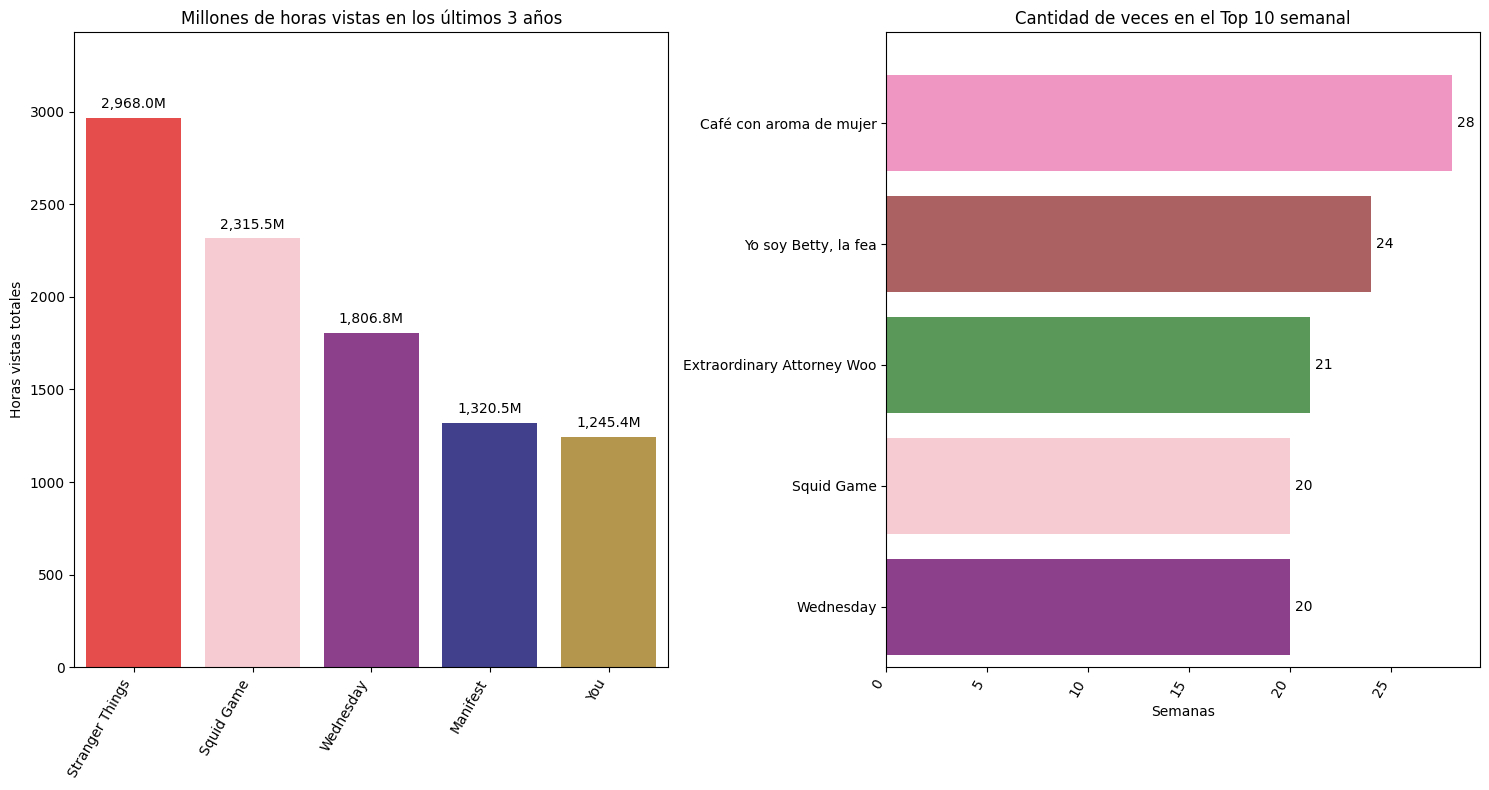

In [28]:


# Preprocesamiento de datos para topseries
#topseries['weekly_hours_viewed'] = topseries['weekly_hours_viewed'] / 1000000
grafico_topseries = topseries.nlargest(5, "weekly_hours_viewed")
pastel_magenta_hex = '#FFB6C1'

colores_gigi = ['red',pastel_magenta_hex,'purple','navy','darkgoldenrod']
colores_gigi2 = ['hotpink','brown','forestgreen',pastel_magenta_hex, 'purple']

# Grafico combinado
plt.figure(figsize=(15, 8))

# Primer gráfico
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico_topseries, palette=colores_gigi, alpha= 0.8)
ax1.set_xlabel('')
ax1.set_ylabel('Horas vistas totales')
ax1.set_title('Millones de horas vistas en los últimos 3 años')
ax1.ticklabel_format(style='plain', axis='y')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.1f}M',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='right')
ax1.set_ylim(top=ax1.get_ylim()[1] * 1.1)

# Segundo gráfico
plt.subplot(1, 2, 2)
grafico_series_top5 = series_top5_titles
ax2 = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico_series_top5, palette=colores_gigi2, alpha = 0.8)
ax2.set_xlabel('Semanas')
ax2.set_ylabel('')
ax2.set_title('Cantidad de veces en el Top 10 semanal')
ax2.ticklabel_format(style='plain', axis='x')
for p in ax2.patches:
    width = p.get_width()
    ax2.annotate(f'{width:.0f}',
                 (width, p.get_y() + p.get_height() / 2.),
                 ha='center', va='center', xytext=(10, 0), textcoords='offset points')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='right')
ax2.set_ylim(top=ax2.get_ylim()[1] * 1.5)

# Ajustes de diseño
plt.tight_layout()
plt.show()


C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\2251619007.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico_toppelis, palette='pastel')
C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\2251619007.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='right')
C:\Users\kaled\AppData\Local\Temp\ipykernel_22152\2251619007.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico_peliculas_top5, palette=colores_gigi3, alpha = 0.

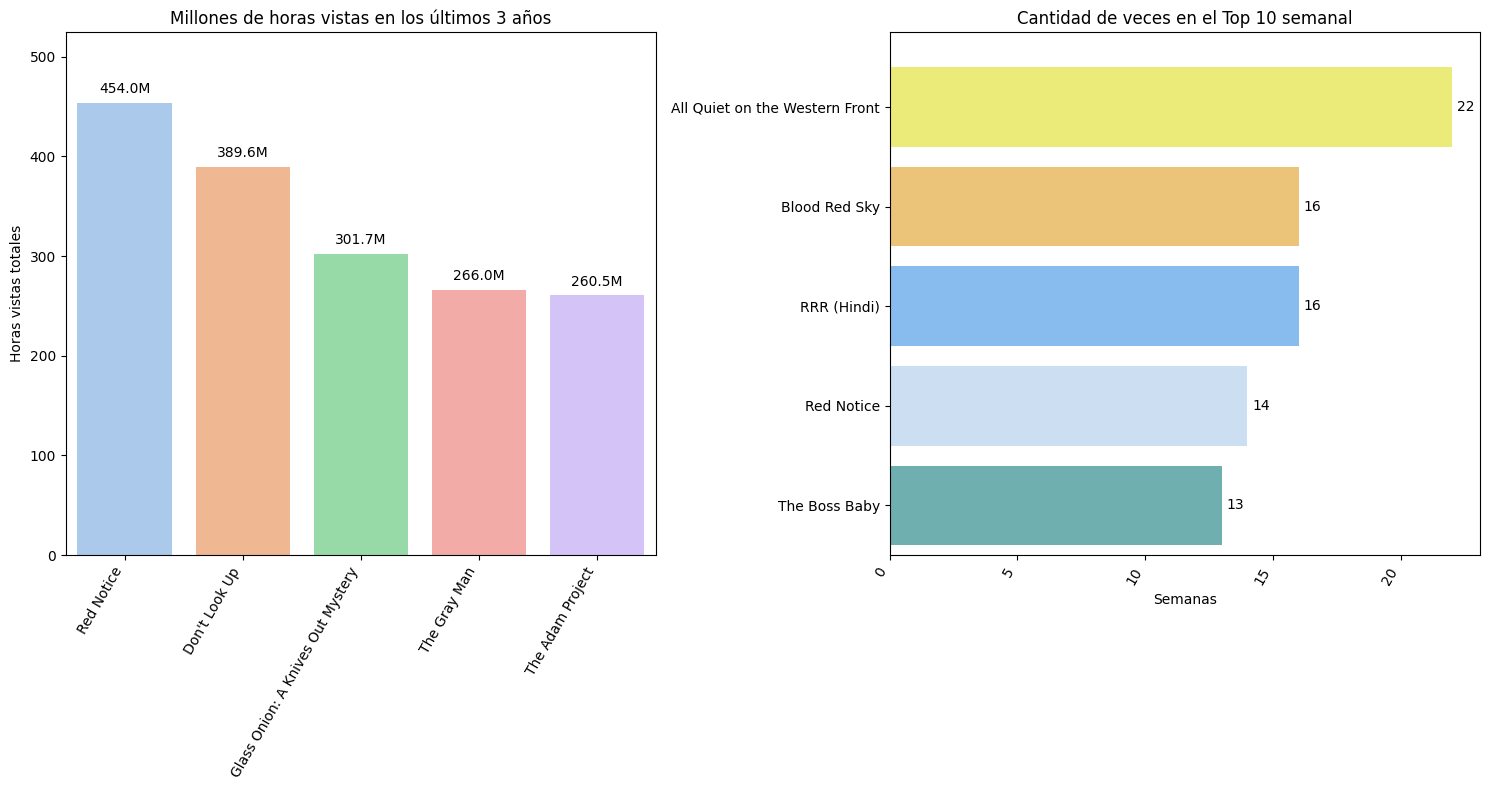

In [29]:

grafico_toppelis = toppelis.nlargest(5, "weekly_hours_viewed")

grafico_peliculas_top5 = peliculas_top5_titles
primer_color_pastel = sns.color_palette("pastel")[0]
colores_gigi3 = ['yellow', 'orange', 'dodgerblue',primer_color_pastel,'darkcyan']
# Grafico combinado
plt.figure(figsize=(15, 8))

# Primer gráfico
plt.subplot(1, 2, 1)
ax2 = sns.barplot(x='show_title', y='weekly_hours_viewed', data=grafico_toppelis, palette='pastel')
ax2.set_xlabel('')
ax2.set_ylabel('Horas vistas totales')
ax2.set_title('Millones de horas vistas en los últimos 3 años')
ax2.ticklabel_format(style='plain', axis='y')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():,.1f}M',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='right')
ax2.set_ylim(top=ax2.get_ylim()[1] * 1.1)

# Segundo gráfico
plt.subplot(1, 2, 2)
ax3 = sns.barplot(x='cumulative_weeks_in_top_10', y='show_title', data=grafico_peliculas_top5, palette=colores_gigi3, alpha = 0.6)
ax3.set_xlabel('Semanas')
ax3.set_ylabel('')
ax3.set_title('Cantidad de veces en el Top 10 semanal')
ax3.ticklabel_format(style='plain', axis='x')
for p in ax3.patches:
    width = p.get_width()
    ax3.annotate(f'{width:.0f}',
                 (width, p.get_y() + p.get_height() / 2.),
                 ha='center', va='center', xytext=(10, 0), textcoords='offset points')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60, ha='right')
ax3.set_ylim(top=ax3.get_ylim()[1] * 1.5)

# Ajustes de diseño
plt.tight_layout()
plt.show()


In [30]:
''''''''' Conclusiones: 
1- Los mexicanos influyen mucho en estos datos, me cago en dios, betty la fea. top 13 cafe con aroma.
2- No miren ninguna de estas mierdas, miren anime, es mejor.
3- The imitation game le gusta a mi novia
4- Glass Onion = GOD
5- Dont look up, es decente
6- las peliculas mas vistas (top semanal), dan verguenza.
7- WTF como tiene un oscar a mejor cancion RRR hindi 


'''

' Conclusiones: \n1- Los mexicanos influyen mucho en estos datos, me cago en dios, betty la fea. top 13 cafe con aroma.\n2- No miren ninguna de estas mierdas, miren anime, es mejor.\n3- The imitation game le gusta a mi novia\n4- Glass Onion = GOD\n5- Dont look up, es decente\n6- las peliculas mas vistas (top semanal), dan verguenza.\n7- WTF como tiene un oscar a mejor cancion RRR hindi \n\n\n'